In [1]:
# !conda update conda
# !pip install --upgrade pip
# !pip install konlpy
# !pip install tweepy==3.10.0
# !conda install -y  -c conda-forge jpype1==1.0.2
# !conda install -y  -c conda-forge wordcloud
# !conda install -y nltk
# !conda install -y scikit-learn

In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
import tweepy
tweepy.__version__

'3.10.0'

In [5]:
import jpype
jpype.__version__

'1.0.2'

In [7]:
from konlpy.tag import Okt

t = Okt()

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
from konlpy.tag import Hannanum

hannanaum = Hannanum()
hannanaum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [5]:
from konlpy.tag import Okt
t = Okt()

In [6]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [8]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

In [9]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [11]:
text = open('./dataset/06_alice.txt', encoding='utf-8').read()
print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without picture

In [12]:
alice_mask = np.array(Image.open('./dataset/06_alice_mask.png'))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [14]:
stopwords.add('said')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system sorry.")

Text(0.5, 1.0, '헬로우~~~~')

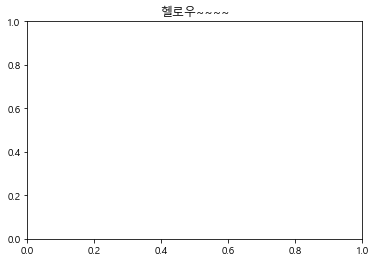

In [16]:
plt.title('헬로우~~~~')

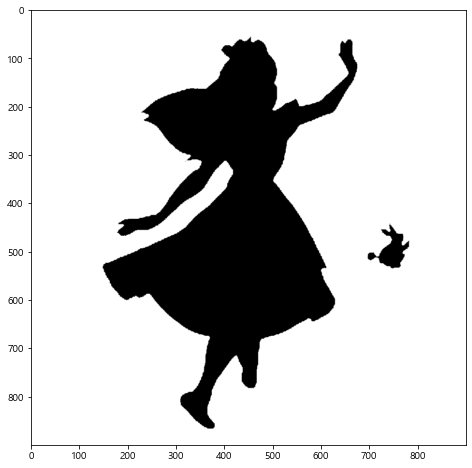

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')

In [20]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)

In [21]:
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

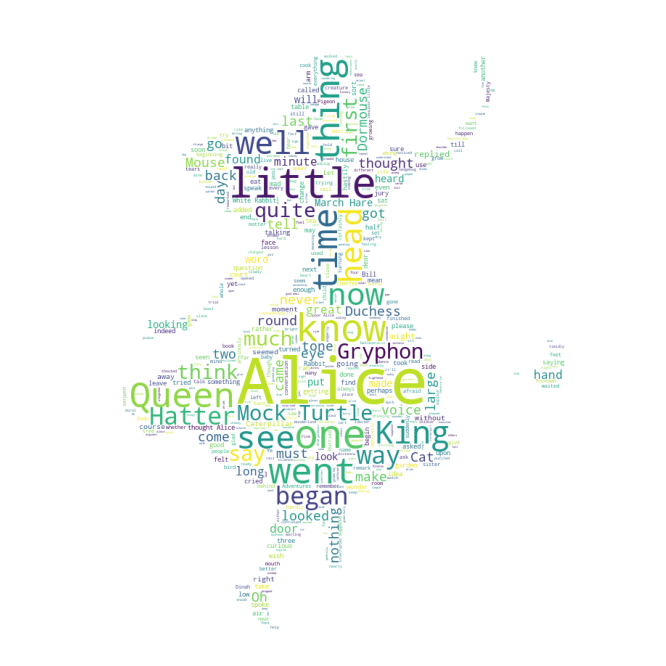

In [24]:
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [25]:
text = open('./dataset/06_a_new_hope.txt', encoding='utf-8').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./dataset/06_stormtrooper_mask.png'))

In [26]:
stopwords.add('int')
stopwords.add('ext')

In [33]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10)
wc = wc.generate(text)

In [34]:
default_colors = wc.to_array()

In [35]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)

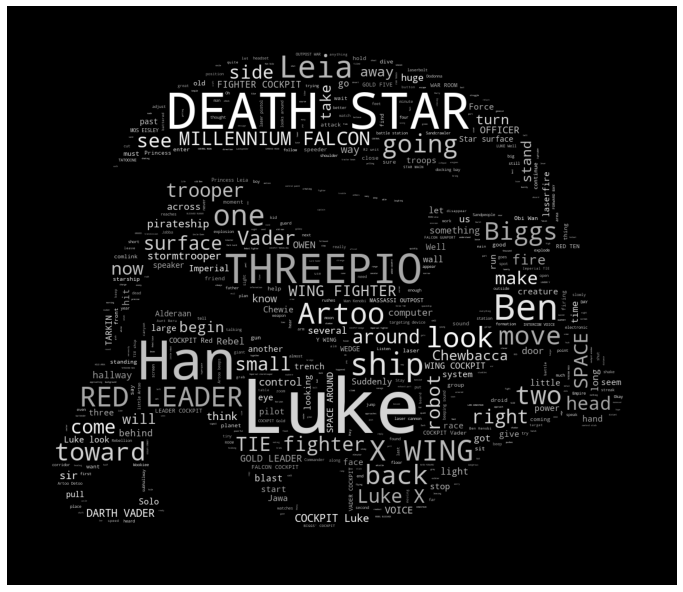

In [36]:
plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=13))
plt.axis('off')
plt.show()

In [37]:
import nltk
from konlpy.corpus import kobill

doc_ko = kobill.open('1809890.txt').read()

In [38]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [39]:
from konlpy.tag import Okt

In [40]:
t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [41]:
ko = nltk.Text(tokens_ko, name='육아휴직법')
ko

<Text: 육아휴직법>

In [42]:
len(ko.tokens)

735

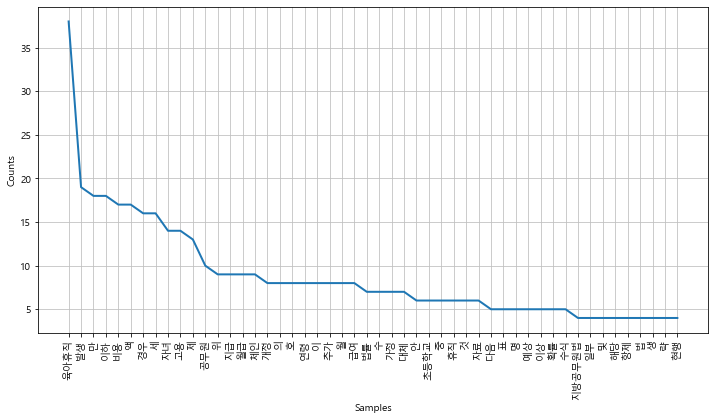

In [43]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

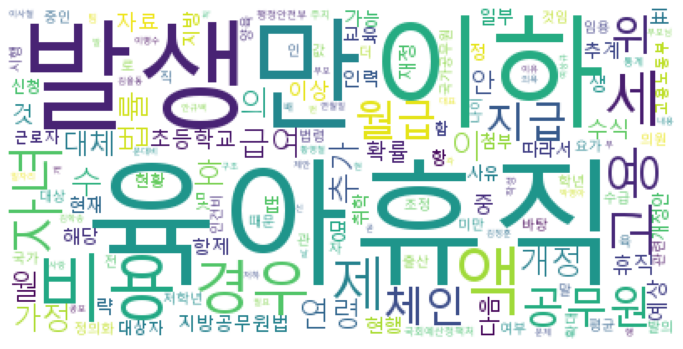

In [44]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [45]:
from nltk.tokenize import word_tokenize
import nltk

In [46]:
train = [('i like you', 'pos'), ('i hate you', 'neg'), ('you like me', 'neg'), ('i like her', 'pos')]

In [47]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))

all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [48]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]

In [49]:
t

[({'i': True,
   'me': False,
   'hate': False,
   'you': True,
   'her': False,
   'like': True},
  'pos'),
 ({'i': True,
   'me': False,
   'hate': True,
   'you': True,
   'her': False,
   'like': False},
  'neg'),
 ({'i': False,
   'me': True,
   'hate': False,
   'you': True,
   'her': False,
   'like': True},
  'neg'),
 ({'i': True,
   'me': False,
   'hate': False,
   'you': False,
   'her': True,
   'like': True},
  'pos')]

In [50]:
classifier  = nltk.NaiveBayesClassifier.train(t)

In [51]:
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [52]:
test_sentence = 'i like Merui'

test_sent_features = {
    word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words
}

test_sent_features

{'i': True,
 'me': False,
 'hate': False,
 'you': False,
 'her': False,
 'like': True}

In [53]:
classifier.classify(test_sent_features)

'pos'

In [54]:
from konlpy.tag import Okt
pos_tagger = Okt()

In [55]:
train = [
    ("메리가 좋아", "pos"),
    ("고양이도 좋아", "pos"),
    ("난 수업이 지루해", "neg"),
    ("메리는 이쁜 고양이야", "pos"),
    ("난 마치고 메리랑 놀거야", "pos")
]

In [56]:
all_words = set(
    word for sentence in train for word in word_tokenize(sentence[0])
)

all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [57]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'수업이': False,
   '메리는': False,
   '마치고': False,
   '고양이도': False,
   '이쁜': False,
   '메리랑': False,
   '메리가': True,
   '지루해': False,
   '놀거야': False,
   '난': False,
   '고양이야': False,
   '좋아': True},
  'pos'),
 ({'수업이': False,
   '메리는': False,
   '마치고': False,
   '고양이도': True,
   '이쁜': False,
   '메리랑': False,
   '메리가': False,
   '지루해': False,
   '놀거야': False,
   '난': False,
   '고양이야': False,
   '좋아': True},
  'pos'),
 ({'수업이': True,
   '메리는': False,
   '마치고': False,
   '고양이도': False,
   '이쁜': False,
   '메리랑': False,
   '메리가': False,
   '지루해': True,
   '놀거야': False,
   '난': True,
   '고양이야': False,
   '좋아': False},
  'neg'),
 ({'수업이': False,
   '메리는': True,
   '마치고': False,
   '고양이도': False,
   '이쁜': True,
   '메리랑': False,
   '메리가': False,
   '지루해': False,
   '놀거야': False,
   '난': False,
   '고양이야': True,
   '좋아': False},
  'pos'),
 ({'수업이': False,
   '메리는': False,
   '마치고': True,
   '고양이도': False,
   '이쁜': False,
   '메리랑': True,
   '메리가': False,
   '지루해': False,
   '놀거야': True,
   '난': 

In [58]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [59]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

test_sent_features = {
    word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words
}

test_sent_features

{'수업이': True,
 '메리는': False,
 '마치고': False,
 '고양이도': False,
 '이쁜': False,
 '메리랑': True,
 '메리가': False,
 '지루해': False,
 '놀거야': True,
 '난': True,
 '고양이야': False,
 '좋아': False}

In [60]:
classifier.classify(test_sent_features)

'neg'

In [61]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [62]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [63]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [64]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [65]:
train_xy = [(term_exists(d), c) for d, c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [66]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [68]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [69]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [70]:
classifier.classify(test_sent_features)

'pos'

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

In [72]:
contents = [
    '상처받은 아이들은 너무 일찍 커버려',
    '내가 상처받은 거 아는 사람 불편해',
    '잘 사는 사람들은 좋은 사람 되기 쉬워',
    '아무 일도 아니야 괜찮아'
]

In [73]:
from konlpy.tag import Okt
t = Okt()

In [74]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니야', '괜찮아']]

In [75]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']

In [76]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [77]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [78]:
vectorizer.get_feature_names() # 말뭉치 길이

['괜찮아',
 '너무',
 '되기',
 '받은',
 '불편해',
 '사는',
 '사람',
 '상처',
 '쉬워',
 '아는',
 '아니야',
 '아무',
 '아이',
 '일도',
 '일찍',
 '좋은',
 '커버']

In [79]:
X.toarray().transpose()

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 2, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]], dtype=int64)

In [81]:
new_post = ['상처받기 싫어 괜찮아']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 상처 받기 싫어 괜찮아']

In [82]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [83]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [84]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[2.449489742783178, 2.23606797749979, 3.1622776601683795, 2.0]

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [86]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [87]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [88]:
X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

In [89]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0.78528828, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6191303 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [90]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())

    delta = v1_normalized - v2_normalized

    return sp.linalg.norm(delta.toarray())

In [91]:
dist = [dist_norm(each, new_post_vec) for each in X]
dist

[1.254451632446019, 1.2261339938790283, 1.4142135623730951, 1.1021396119773588]